In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
X = df.drop('class',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['class']

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=101)

### Gradient Boosting with GridSearchCV

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
#help(GradientBoostingClassifier)

In [7]:
param_grid = {'n_estimators':[50,64,90,100,115,128],
             'max_depth':[3,4,5,6,7,8]}

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
gb_model = GradientBoostingClassifier()

In [11]:
grid = GridSearchCV(gb_model,param_grid)

In [12]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 64, 90, 100, 115, 128]})

In [13]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
y_pred = grid.predict(X_test)
y_pred

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [18]:
feat_imp = grid.best_estimator_.feature_importances_

In [20]:
imp_feat = pd.DataFrame(index = X.columns, data=feat_imp,columns=["Importance"])
imp_feat.sort_values('Importance',ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.135970
bruises_t,0.054453
stalk-root_r,0.045731
spore-print-color_r,0.030495
...,...
stalk-surface-below-ring_s,0.000000
cap-color_u,0.000000
cap-color_r,0.000000
gill-color_e,0.000000


In [21]:
imp_feat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.064694,0.0,0.0,6.469357e-08,0.000635,0.614744


In [30]:
df = imp_feat[imp_feat['Importance']>0.010526].sort_values('Importance')

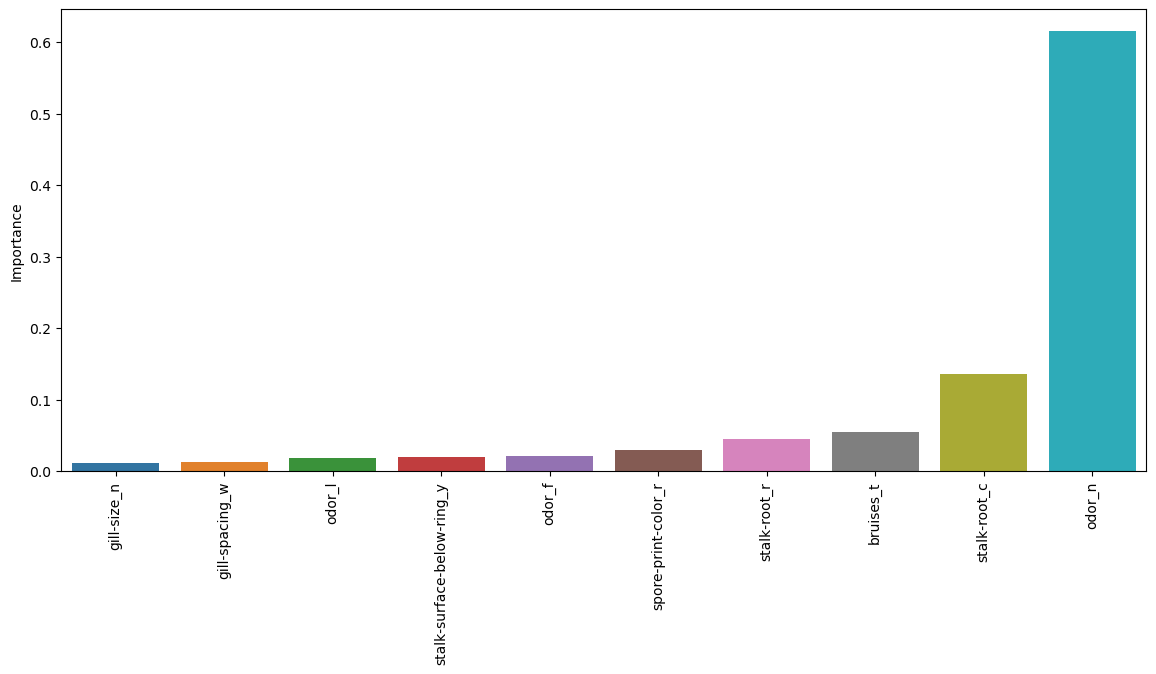

In [31]:
plt.figure(figsize=(14,6))
sns.barplot(data=df,x=df.index,y='Importance')
plt.xticks(rotation=90)
plt.show()